In [15]:
!pip install librosa
!pip install tqdm

You should consider upgrading via the '/home/jack/anaconda3/envs/exp38/bin/python -m pip install --upgrade pip' command.
     |████████████████████████████████| 72 kB 139 kB/s eta 0:00:01
You should consider upgrading via the '/home/jack/anaconda3/envs/exp38/bin/python -m pip install --upgrade pip' command.


In [1]:
import librosa
from librosa import display
import os
import pandas as pd
from glob import glob
from tqdm import tqdm
import time
import numpy as np

In [2]:
def extract_mfcc(file):
    #Load librosa array, obtain mfcss, store the file and the mcss information in a new array
    X, sample_rate = librosa.load(file, res_type='kaiser_fast')
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0) 
    # The instruction below converts the labels (from 1 to 8) to a series from 0 to 7
    # This is because our predictor needs to start from 0 otherwise it will try to predict also 0.
  # If the file is not valid, skip it
    
    return mfccs

In [86]:
class_map = {'angry':0, 'disgust':1, 'fearful':2,'happy':3,'neutral':4,'sad':5,'surprised':6}
def data_extract(data):
    data_path = data+'/*/*.wav' 
    img_paths = glob(data_path)
    data_count = len(glob(data_path))
    print(data_count)

    X = np.zeros((data_count, 40))
    y = np.zeros((data_count, ))
    for i, path in tqdm(sorted(enumerate(img_paths))):

        X[i] = extract_mfcc(path)

        cls = path.split('/')[-2]

        y[i] = class_map[cls]
    return X,y

# Train data Extract

In [118]:
X,y =data_extract('train') 

  0%|          | 2/1963 [00:00<01:38, 19.91it/s]

1963


100%|██████████| 1963/1963 [02:14<00:00, 14.65it/s]


In [119]:
import joblib
import keras
X_name = 'X_train.joblib'
y_name = 'y_train.joblib'

y_onehot = keras.utils.to_categorical(y, num_classes=7)
print(y.shape)
savedX = joblib.dump(X,X_name)
savedy = joblib.dump(y_onehot, y_name)

(1963,)


# Confusion Matrix

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [34]:
import joblib
import keras
X_train = joblib.load('X_train.joblib')
y_train = joblib.load('y_train.joblib')



x_traincnn = np.expand_dims(X_train, axis=2)
print(x_traincnn.shape,y_train.shape)
print(y_train[0])
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation
from tensorflow.python.framework import tensor_util

from tensorflow.keras.layers import Conv1D, MaxPooling1D,LSTM,LeakyReLU,Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint



(1963, 40, 1) (1963, 7)
[0. 1. 0. 0. 0. 0. 0.]


(1963, 40, 1) (1571, 7)
(1963, 40, 1) (1571, 7)
[0. 1. 0. 0. 0. 0. 0.]
(1766,) (197,)
Epoch 1/1000
14/14 [==============================] - 1s 8ms/step - loss: 7.1830 - accuracy: 0.1270
Epoch 2/1000
14/14 [==============================] - 0s 8ms/step - loss: 2.1952 - accuracy: 0.1865
Epoch 3/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.8844 - accuracy: 0.2248
Epoch 4/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.8706 - accuracy: 0.2612
Epoch 5/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.8371 - accuracy: 0.2513
Epoch 6/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.8260 - accuracy: 0.2639
Epoch 7/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.8195 - accuracy: 0.2505
Epoch 8/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.8147 - accuracy: 0.2648
Epoch 9/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.8034 - accuracy: 0.2864
Epoch 10/1000


14/14 [==============================] - 0s 8ms/step - loss: 0.6078 - accuracy: 0.7778
Epoch 82/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.6566 - accuracy: 0.7591
Epoch 83/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.6592 - accuracy: 0.7549
Epoch 84/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.5742 - accuracy: 0.7780
Epoch 85/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.5683 - accuracy: 0.7798
Epoch 86/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.5693 - accuracy: 0.7886
Epoch 87/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.5449 - accuracy: 0.7943
Epoch 88/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.5645 - accuracy: 0.8001
Epoch 89/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.5650 - accuracy: 0.7819
Epoch 90/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.5607 - accuracy: 0.7949
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.1704 - accuracy: 0.9376
Epoch 162/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.2005 - accuracy: 0.9215
Epoch 163/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.2078 - accuracy: 0.9281
Epoch 164/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1837 - accuracy: 0.9345
Epoch 165/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1626 - accuracy: 0.9508
Epoch 166/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1990 - accuracy: 0.9239
Epoch 167/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1832 - accuracy: 0.9350
Epoch 168/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1851 - accuracy: 0.9375
Epoch 169/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1662 - accuracy: 0.9390
Epoch 170/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1715 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0952 - accuracy: 0.9644
Epoch 242/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0805 - accuracy: 0.9737
Epoch 243/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1077 - accuracy: 0.9621
Epoch 244/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1352 - accuracy: 0.9573
Epoch 245/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0773 - accuracy: 0.9758
Epoch 246/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0883 - accuracy: 0.9675
Epoch 247/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0825 - accuracy: 0.9724
Epoch 248/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1187 - accuracy: 0.9604
Epoch 249/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0986 - accuracy: 0.9676
Epoch 250/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0683 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0777 - accuracy: 0.9777
Epoch 322/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0698 - accuracy: 0.9785
Epoch 323/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0762 - accuracy: 0.9775
Epoch 324/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0684 - accuracy: 0.9732
Epoch 325/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0632 - accuracy: 0.9791
Epoch 326/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0738 - accuracy: 0.9750
Epoch 327/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0794 - accuracy: 0.9711
Epoch 328/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0791 - accuracy: 0.9745
Epoch 329/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0497 - accuracy: 0.9859
Epoch 330/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0683 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0552 - accuracy: 0.9858
Epoch 402/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0696 - accuracy: 0.9766
Epoch 403/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0741 - accuracy: 0.9820
Epoch 404/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0560 - accuracy: 0.9784
Epoch 405/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0738 - accuracy: 0.9760
Epoch 406/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0705 - accuracy: 0.9745
Epoch 407/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0523 - accuracy: 0.9842
Epoch 408/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0481 - accuracy: 0.9789
Epoch 409/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0616 - accuracy: 0.9784
Epoch 410/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0598 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0478 - accuracy: 0.9843
Epoch 482/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0582 - accuracy: 0.9789
Epoch 483/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0604 - accuracy: 0.9761
Epoch 484/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0542 - accuracy: 0.9839
Epoch 485/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0437 - accuracy: 0.9847
Epoch 486/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0471 - accuracy: 0.9855
Epoch 487/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0698 - accuracy: 0.9837
Epoch 488/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0601 - accuracy: 0.9800
Epoch 489/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0636 - accuracy: 0.9758
Epoch 490/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0530 - accuracy

14/14 [==============================] - 0s 9ms/step - loss: 0.0449 - accuracy: 0.9821
Epoch 562/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0511 - accuracy: 0.9764
Epoch 563/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0678 - accuracy: 0.9792
Epoch 564/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0645 - accuracy: 0.9722
Epoch 565/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0509 - accuracy: 0.9815
Epoch 566/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0774 - accuracy: 0.9830
Epoch 567/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0601 - accuracy: 0.9811
Epoch 568/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0607 - accuracy: 0.9843
Epoch 569/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0627 - accuracy: 0.9814
Epoch 570/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0829 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0637 - accuracy: 0.9741
Epoch 642/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0431 - accuracy: 0.9886
Epoch 643/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0568 - accuracy: 0.9832
Epoch 644/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0417 - accuracy: 0.9846
Epoch 645/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0324 - accuracy: 0.9917
Epoch 646/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0427 - accuracy: 0.9824
Epoch 647/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0349 - accuracy: 0.9881
Epoch 648/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0224 - accuracy: 0.9921
Epoch 649/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0278 - accuracy: 0.9913
Epoch 650/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0406 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0210 - accuracy: 0.9897
Epoch 722/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0348 - accuracy: 0.9906
Epoch 723/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0434 - accuracy: 0.9888
Epoch 724/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0538 - accuracy: 0.9846
Epoch 725/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0606 - accuracy: 0.9815
Epoch 726/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0537 - accuracy: 0.9853
Epoch 727/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0258 - accuracy: 0.9897
Epoch 728/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0475 - accuracy: 0.9860
Epoch 729/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0474 - accuracy: 0.9846
Epoch 730/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0362 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0358 - accuracy: 0.9895
Epoch 802/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0489 - accuracy: 0.9858
Epoch 803/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0255 - accuracy: 0.9908
Epoch 804/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0451 - accuracy: 0.9877
Epoch 805/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0315 - accuracy: 0.9910
Epoch 806/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0223 - accuracy: 0.9953
Epoch 807/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0259 - accuracy: 0.9910
Epoch 808/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0253 - accuracy: 0.9934
Epoch 809/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0145 - accuracy: 0.9933
Epoch 810/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0281 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0350 - accuracy: 0.9889
Epoch 882/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0283 - accuracy: 0.9894
Epoch 883/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0311 - accuracy: 0.9905
Epoch 884/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0345 - accuracy: 0.9902
Epoch 885/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0231 - accuracy: 0.9923
Epoch 886/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0363 - accuracy: 0.9906
Epoch 887/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0248 - accuracy: 0.9928
Epoch 888/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0283 - accuracy: 0.9897
Epoch 889/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0110 - accuracy: 0.9966
Epoch 890/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0309 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0457 - accuracy: 0.9879
Epoch 962/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0279 - accuracy: 0.9873
Epoch 963/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0387 - accuracy: 0.9918
Epoch 964/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0281 - accuracy: 0.9957
Epoch 965/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0390 - accuracy: 0.9829
Epoch 966/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0443 - accuracy: 0.9857
Epoch 967/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0305 - accuracy: 0.9882
Epoch 968/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0308 - accuracy: 0.9873
Epoch 969/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0461 - accuracy: 0.9812
Epoch 970/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0422 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 1.1954 - accuracy: 0.5507
Epoch 35/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.1755 - accuracy: 0.5456
Epoch 36/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.1665 - accuracy: 0.5480
Epoch 37/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.1676 - accuracy: 0.5582
Epoch 38/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.1758 - accuracy: 0.5503
Epoch 39/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.1081 - accuracy: 0.5665
Epoch 40/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.0859 - accuracy: 0.5652
Epoch 41/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.0760 - accuracy: 0.5923
Epoch 42/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.0441 - accuracy: 0.6101
Epoch 43/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.0550 - accuracy: 0.5807
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.2800 - accuracy: 0.8940
Epoch 116/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2577 - accuracy: 0.9090
Epoch 117/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2867 - accuracy: 0.8976
Epoch 118/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2415 - accuracy: 0.9209
Epoch 119/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2390 - accuracy: 0.9159
Epoch 120/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.2475 - accuracy: 0.9167
Epoch 121/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2464 - accuracy: 0.9062
Epoch 122/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.2456 - accuracy: 0.9064
Epoch 123/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2343 - accuracy: 0.9155
Epoch 124/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2073 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.1265 - accuracy: 0.9527
Epoch 196/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1138 - accuracy: 0.9642
Epoch 197/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1281 - accuracy: 0.9524
Epoch 198/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1218 - accuracy: 0.9516
Epoch 199/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1285 - accuracy: 0.9572
Epoch 200/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1259 - accuracy: 0.9564
Epoch 201/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1115 - accuracy: 0.9553
Epoch 202/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1128 - accuracy: 0.9634
Epoch 203/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1041 - accuracy: 0.9682
Epoch 204/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1059 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.1139 - accuracy: 0.9620
Epoch 276/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1036 - accuracy: 0.9636
Epoch 277/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0948 - accuracy: 0.9691
Epoch 278/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0700 - accuracy: 0.9783
Epoch 279/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0941 - accuracy: 0.9706
Epoch 280/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0963 - accuracy: 0.9686
Epoch 281/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0775 - accuracy: 0.9731
Epoch 282/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0654 - accuracy: 0.9746
Epoch 283/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0515 - accuracy: 0.9787
Epoch 284/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0892 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0572 - accuracy: 0.9820
Epoch 356/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0493 - accuracy: 0.9786
Epoch 357/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0837 - accuracy: 0.9722
Epoch 358/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0668 - accuracy: 0.9739
Epoch 359/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0773 - accuracy: 0.9802
Epoch 360/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0823 - accuracy: 0.9670
Epoch 361/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0603 - accuracy: 0.9834
Epoch 362/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0757 - accuracy: 0.9760
Epoch 363/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0864 - accuracy: 0.9681
Epoch 364/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0577 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0631 - accuracy: 0.9769
Epoch 436/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0491 - accuracy: 0.9850
Epoch 437/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0612 - accuracy: 0.9795
Epoch 438/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0672 - accuracy: 0.9820
Epoch 439/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0654 - accuracy: 0.9765
Epoch 440/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0500 - accuracy: 0.9808
Epoch 441/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0857 - accuracy: 0.9801
Epoch 442/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0555 - accuracy: 0.9820
Epoch 443/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0649 - accuracy: 0.9855
Epoch 444/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0343 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0542 - accuracy: 0.9807
Epoch 516/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0410 - accuracy: 0.9840
Epoch 517/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0631 - accuracy: 0.9813
Epoch 518/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0379 - accuracy: 0.9869
Epoch 519/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0415 - accuracy: 0.9795
Epoch 520/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0388 - accuracy: 0.9855
Epoch 521/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0364 - accuracy: 0.9891
Epoch 522/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0391 - accuracy: 0.9911
Epoch 523/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0342 - accuracy: 0.9885
Epoch 524/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0838 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0550 - accuracy: 0.9862
Epoch 596/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0624 - accuracy: 0.9814
Epoch 597/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0422 - accuracy: 0.9843
Epoch 598/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0396 - accuracy: 0.9885
Epoch 599/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0555 - accuracy: 0.9802
Epoch 600/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0373 - accuracy: 0.9910
Epoch 601/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0344 - accuracy: 0.9864
Epoch 602/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0481 - accuracy: 0.9816
Epoch 603/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0336 - accuracy: 0.9889
Epoch 604/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0446 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0325 - accuracy: 0.9893
Epoch 676/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0649 - accuracy: 0.9792
Epoch 677/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0392 - accuracy: 0.9890
Epoch 678/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0425 - accuracy: 0.9869
Epoch 679/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0393 - accuracy: 0.9863
Epoch 680/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0642 - accuracy: 0.9789
Epoch 681/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0403 - accuracy: 0.9833
Epoch 682/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0322 - accuracy: 0.9922
Epoch 683/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0716 - accuracy: 0.9762
Epoch 684/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0561 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0348 - accuracy: 0.9872
Epoch 756/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0334 - accuracy: 0.9892
Epoch 757/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0413 - accuracy: 0.9854
Epoch 758/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0249 - accuracy: 0.9910
Epoch 759/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0435 - accuracy: 0.9867
Epoch 760/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0360 - accuracy: 0.9871
Epoch 761/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0233 - accuracy: 0.9918
Epoch 762/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0375 - accuracy: 0.9863
Epoch 763/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0239 - accuracy: 0.9934
Epoch 764/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0316 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0296 - accuracy: 0.9893
Epoch 836/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0439 - accuracy: 0.9855
Epoch 837/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0250 - accuracy: 0.9913
Epoch 838/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0233 - accuracy: 0.9896
Epoch 839/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0353 - accuracy: 0.9881
Epoch 840/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0471 - accuracy: 0.9875
Epoch 841/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0396 - accuracy: 0.9870
Epoch 842/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0308 - accuracy: 0.9940
Epoch 843/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0277 - accuracy: 0.9898
Epoch 844/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0647 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0576 - accuracy: 0.9894
Epoch 916/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0420 - accuracy: 0.9873
Epoch 917/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0266 - accuracy: 0.9900
Epoch 918/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0358 - accuracy: 0.9882
Epoch 919/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0325 - accuracy: 0.9893
Epoch 920/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0421 - accuracy: 0.9804
Epoch 921/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0280 - accuracy: 0.9884
Epoch 922/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0301 - accuracy: 0.9875
Epoch 923/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0303 - accuracy: 0.9852
Epoch 924/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0239 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0312 - accuracy: 0.9879
Epoch 996/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0182 - accuracy: 0.9948
Epoch 997/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0322 - accuracy: 0.9930
Epoch 998/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0396 - accuracy: 0.9844
Epoch 999/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0432 - accuracy: 0.9877
Epoch 1000/1000
16/16 [==============================] - 0s 953us/step - loss: 1.6032 - accuracy: 0.7873
              precision    recall  f1-score   support

       angry       0.79      0.88      0.83        75
     disgust       0.91      0.53      0.67        38
     fearful       0.72      0.63      0.67        75
       happy       0.66      1.00      0.80        75
    neautral       0.91      0.80      0.85       113
         sad       0.82      0.83      0.82        75
   surprised       0.

14/14 [==============================] - 0s 9ms/step - loss: 0.8412 - accuracy: 0.6761
Epoch 70/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.8757 - accuracy: 0.6755
Epoch 71/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.8242 - accuracy: 0.6899
Epoch 72/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.8118 - accuracy: 0.6960
Epoch 73/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.7732 - accuracy: 0.6970
Epoch 74/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.7676 - accuracy: 0.7071
Epoch 75/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.7534 - accuracy: 0.7078
Epoch 76/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.7454 - accuracy: 0.7131
Epoch 77/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.7551 - accuracy: 0.7116
Epoch 78/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.7359 - accuracy: 0.7220
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.2518 - accuracy: 0.9069
Epoch 150/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2572 - accuracy: 0.9037
Epoch 151/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2148 - accuracy: 0.9301
Epoch 152/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3047 - accuracy: 0.9050
Epoch 153/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2475 - accuracy: 0.9164
Epoch 154/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.2296 - accuracy: 0.9152
Epoch 155/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.2539 - accuracy: 0.9115
Epoch 156/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.2492 - accuracy: 0.9072
Epoch 157/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2633 - accuracy: 0.9005
Epoch 158/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.2436 - accuracy: 0

14/14 [==============================] - 0s 10ms/step - loss: 0.1373 - accuracy: 0.9526
Epoch 230/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1459 - accuracy: 0.9461
Epoch 231/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1050 - accuracy: 0.9665
Epoch 232/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1216 - accuracy: 0.9577
Epoch 233/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1156 - accuracy: 0.9625
Epoch 234/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0964 - accuracy: 0.9650
Epoch 235/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1087 - accuracy: 0.9610
Epoch 236/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1128 - accuracy: 0.9568
Epoch 237/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1196 - accuracy: 0.9638
Epoch 238/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1024 - accuracy: 0

14/14 [==============================] - 0s 9ms/step - loss: 0.1158 - accuracy: 0.9615
Epoch 310/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0920 - accuracy: 0.9687
Epoch 311/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1133 - accuracy: 0.9692
Epoch 312/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1118 - accuracy: 0.9638
Epoch 313/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1085 - accuracy: 0.9671
Epoch 314/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0868 - accuracy: 0.9638
Epoch 315/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1045 - accuracy: 0.9650
Epoch 316/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1170 - accuracy: 0.9641
Epoch 317/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0870 - accuracy: 0.9652
Epoch 318/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0691 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0600 - accuracy: 0.9750
Epoch 390/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0536 - accuracy: 0.9796
Epoch 391/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0716 - accuracy: 0.9746
Epoch 392/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0829 - accuracy: 0.9635
Epoch 393/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0584 - accuracy: 0.9796
Epoch 394/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0559 - accuracy: 0.9811
Epoch 395/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0750 - accuracy: 0.9794
Epoch 396/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0608 - accuracy: 0.9761
Epoch 397/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0536 - accuracy: 0.9803
Epoch 398/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0791 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0683 - accuracy: 0.9709
Epoch 470/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0748 - accuracy: 0.9783
Epoch 471/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0523 - accuracy: 0.9797
Epoch 472/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0490 - accuracy: 0.9859
Epoch 473/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0632 - accuracy: 0.9823
Epoch 474/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0843 - accuracy: 0.9711
Epoch 475/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0692 - accuracy: 0.9766
Epoch 476/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0573 - accuracy: 0.9805
Epoch 477/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0643 - accuracy: 0.9748
Epoch 478/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0735 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0621 - accuracy: 0.9784
Epoch 550/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0526 - accuracy: 0.9817
Epoch 551/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0590 - accuracy: 0.9803
Epoch 552/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0902 - accuracy: 0.9761
Epoch 553/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0518 - accuracy: 0.9807
Epoch 554/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0456 - accuracy: 0.9814
Epoch 555/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0456 - accuracy: 0.9799
Epoch 556/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0419 - accuracy: 0.9881
Epoch 557/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0757 - accuracy: 0.9753
Epoch 558/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0572 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0329 - accuracy: 0.9880
Epoch 630/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0455 - accuracy: 0.9832
Epoch 631/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0593 - accuracy: 0.9846
Epoch 632/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0331 - accuracy: 0.9865
Epoch 633/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0839 - accuracy: 0.9787
Epoch 634/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0334 - accuracy: 0.9846
Epoch 635/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0413 - accuracy: 0.9826
Epoch 636/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0315 - accuracy: 0.9855
Epoch 637/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0520 - accuracy: 0.9837
Epoch 638/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0419 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0666 - accuracy: 0.9786
Epoch 710/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0435 - accuracy: 0.9849
Epoch 711/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0563 - accuracy: 0.9829
Epoch 712/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0531 - accuracy: 0.9817
Epoch 713/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0447 - accuracy: 0.9795
Epoch 714/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0530 - accuracy: 0.9846
Epoch 715/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0738 - accuracy: 0.9815
Epoch 716/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0346 - accuracy: 0.9835
Epoch 717/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0314 - accuracy: 0.9864
Epoch 718/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0321 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0342 - accuracy: 0.9849
Epoch 790/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0559 - accuracy: 0.9788
Epoch 791/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0389 - accuracy: 0.9855
Epoch 792/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0423 - accuracy: 0.9875
Epoch 793/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0351 - accuracy: 0.9881
Epoch 794/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0471 - accuracy: 0.9855
Epoch 795/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0466 - accuracy: 0.9858
Epoch 796/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0436 - accuracy: 0.9857
Epoch 797/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0434 - accuracy: 0.9838
Epoch 798/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0404 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0303 - accuracy: 0.9936
Epoch 870/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0275 - accuracy: 0.9930
Epoch 871/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0364 - accuracy: 0.9896
Epoch 872/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0314 - accuracy: 0.9890
Epoch 873/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0228 - accuracy: 0.9924
Epoch 874/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0369 - accuracy: 0.9915
Epoch 875/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0425 - accuracy: 0.9852
Epoch 876/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0664 - accuracy: 0.9794
Epoch 877/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0371 - accuracy: 0.9866
Epoch 878/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0261 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0319 - accuracy: 0.9871
Epoch 950/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0402 - accuracy: 0.9879
Epoch 951/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0356 - accuracy: 0.9893
Epoch 952/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0400 - accuracy: 0.9830
Epoch 953/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0464 - accuracy: 0.9860
Epoch 954/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0446 - accuracy: 0.9869
Epoch 955/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0282 - accuracy: 0.9916
Epoch 956/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0396 - accuracy: 0.9862
Epoch 957/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0420 - accuracy: 0.9845
Epoch 958/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0595 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 1.4057 - accuracy: 0.4584
Epoch 23/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.4032 - accuracy: 0.4429
Epoch 24/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.3541 - accuracy: 0.4729
Epoch 25/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.3234 - accuracy: 0.4833
Epoch 26/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.3440 - accuracy: 0.4588
Epoch 27/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.2712 - accuracy: 0.5086
Epoch 28/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.2417 - accuracy: 0.5305
Epoch 29/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.2468 - accuracy: 0.5052
Epoch 30/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.2526 - accuracy: 0.5061
Epoch 31/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.2665 - accuracy: 0.4979
Epoc

14/14 [==============================] - 0s 10ms/step - loss: 0.3424 - accuracy: 0.8806
Epoch 104/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3253 - accuracy: 0.8903
Epoch 105/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3193 - accuracy: 0.8902
Epoch 106/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3057 - accuracy: 0.8975
Epoch 107/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2826 - accuracy: 0.8936
Epoch 108/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.3606 - accuracy: 0.8653
Epoch 109/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3234 - accuracy: 0.8797
Epoch 110/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2976 - accuracy: 0.8895
Epoch 111/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3183 - accuracy: 0.8852
Epoch 112/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3013 - accuracy: 0

14/14 [==============================] - 0s 9ms/step - loss: 0.1551 - accuracy: 0.9427
Epoch 184/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1290 - accuracy: 0.9554
Epoch 185/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1469 - accuracy: 0.9412
Epoch 186/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1476 - accuracy: 0.9493
Epoch 187/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1253 - accuracy: 0.9572
Epoch 188/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1253 - accuracy: 0.9663
Epoch 189/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1566 - accuracy: 0.9483
Epoch 190/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1436 - accuracy: 0.9468
Epoch 191/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1479 - accuracy: 0.9518
Epoch 192/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1376 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0878 - accuracy: 0.9755
Epoch 264/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0846 - accuracy: 0.9712
Epoch 265/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0755 - accuracy: 0.9724
Epoch 266/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0966 - accuracy: 0.9677
Epoch 267/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0780 - accuracy: 0.9739
Epoch 268/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0637 - accuracy: 0.9786
Epoch 269/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0821 - accuracy: 0.9721
Epoch 270/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0600 - accuracy: 0.9804
Epoch 271/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0757 - accuracy: 0.9715
Epoch 272/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1070 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0819 - accuracy: 0.9702
Epoch 344/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0892 - accuracy: 0.9629
Epoch 345/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0876 - accuracy: 0.9757
Epoch 346/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0731 - accuracy: 0.9812
Epoch 347/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0712 - accuracy: 0.9828
Epoch 348/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0568 - accuracy: 0.9786
Epoch 349/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0672 - accuracy: 0.9740
Epoch 350/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0621 - accuracy: 0.9837
Epoch 351/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0862 - accuracy: 0.9688
Epoch 352/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0902 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0809 - accuracy: 0.9696
Epoch 424/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0802 - accuracy: 0.9679
Epoch 425/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0562 - accuracy: 0.9812
Epoch 426/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0714 - accuracy: 0.9764
Epoch 427/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0606 - accuracy: 0.9773
Epoch 428/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0845 - accuracy: 0.9694
Epoch 429/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0598 - accuracy: 0.9775
Epoch 430/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0782 - accuracy: 0.9760
Epoch 431/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0587 - accuracy: 0.9851
Epoch 432/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0707 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0469 - accuracy: 0.9810
Epoch 504/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0636 - accuracy: 0.9820
Epoch 505/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0428 - accuracy: 0.9852
Epoch 506/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0528 - accuracy: 0.9834
Epoch 507/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0655 - accuracy: 0.9785
Epoch 508/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0469 - accuracy: 0.9806
Epoch 509/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0370 - accuracy: 0.9890
Epoch 510/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0381 - accuracy: 0.9868
Epoch 511/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0466 - accuracy: 0.9846
Epoch 512/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0402 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0484 - accuracy: 0.9837
Epoch 584/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0415 - accuracy: 0.9858
Epoch 585/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0434 - accuracy: 0.9897
Epoch 586/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0597 - accuracy: 0.9856
Epoch 587/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0485 - accuracy: 0.9854
Epoch 588/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0692 - accuracy: 0.9710
Epoch 589/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0532 - accuracy: 0.9813
Epoch 590/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0600 - accuracy: 0.9785
Epoch 591/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0593 - accuracy: 0.9783
Epoch 592/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0525 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0405 - accuracy: 0.9881
Epoch 664/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0228 - accuracy: 0.9905
Epoch 665/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0285 - accuracy: 0.9891
Epoch 666/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0358 - accuracy: 0.9853
Epoch 667/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0379 - accuracy: 0.9875
Epoch 668/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0339 - accuracy: 0.9878
Epoch 669/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0310 - accuracy: 0.9914
Epoch 670/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0400 - accuracy: 0.9803
Epoch 671/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0478 - accuracy: 0.9836
Epoch 672/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0253 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0443 - accuracy: 0.9877
Epoch 744/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0452 - accuracy: 0.9851
Epoch 745/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0428 - accuracy: 0.9857
Epoch 746/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0413 - accuracy: 0.9872
Epoch 747/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0217 - accuracy: 0.9933
Epoch 748/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0421 - accuracy: 0.9870
Epoch 749/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0321 - accuracy: 0.9897
Epoch 750/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0390 - accuracy: 0.9857
Epoch 751/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0411 - accuracy: 0.9843
Epoch 752/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0399 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0326 - accuracy: 0.9908
Epoch 824/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0293 - accuracy: 0.9898
Epoch 825/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0393 - accuracy: 0.9899
Epoch 826/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0656 - accuracy: 0.9849
Epoch 827/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0289 - accuracy: 0.9880
Epoch 828/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0408 - accuracy: 0.9845
Epoch 829/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0422 - accuracy: 0.9870
Epoch 830/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0465 - accuracy: 0.9845
Epoch 831/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0321 - accuracy: 0.9888
Epoch 832/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0434 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0209 - accuracy: 0.9909
Epoch 904/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0295 - accuracy: 0.9904
Epoch 905/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0402 - accuracy: 0.9857
Epoch 906/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0459 - accuracy: 0.9871
Epoch 907/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0250 - accuracy: 0.9906
Epoch 908/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0416 - accuracy: 0.9834
Epoch 909/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0160 - accuracy: 0.9941
Epoch 910/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0242 - accuracy: 0.9933
Epoch 911/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0253 - accuracy: 0.9913
Epoch 912/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0242 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0347 - accuracy: 0.9905
Epoch 984/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0258 - accuracy: 0.9922
Epoch 985/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0225 - accuracy: 0.9938
Epoch 986/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0340 - accuracy: 0.9911
Epoch 987/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0228 - accuracy: 0.9923
Epoch 988/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0391 - accuracy: 0.9854
Epoch 989/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0479 - accuracy: 0.9835
Epoch 990/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0304 - accuracy: 0.9913
Epoch 991/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0348 - accuracy: 0.9891
Epoch 992/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0275 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.9103 - accuracy: 0.6449
Epoch 57/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.8628 - accuracy: 0.6775
Epoch 58/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.8774 - accuracy: 0.6687
Epoch 59/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.9522 - accuracy: 0.6370
Epoch 60/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.8325 - accuracy: 0.6926
Epoch 61/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.8223 - accuracy: 0.6970
Epoch 62/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.8027 - accuracy: 0.6909
Epoch 63/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.7685 - accuracy: 0.7019
Epoch 64/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.7917 - accuracy: 0.7213
Epoch 65/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.8785 - accuracy: 0.6813
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.2658 - accuracy: 0.8920
Epoch 137/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2400 - accuracy: 0.9065
Epoch 138/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2289 - accuracy: 0.9143
Epoch 139/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.2292 - accuracy: 0.9174
Epoch 140/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2218 - accuracy: 0.9219
Epoch 141/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2605 - accuracy: 0.9049
Epoch 142/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2593 - accuracy: 0.9032
Epoch 143/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.2262 - accuracy: 0.9137
Epoch 144/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1921 - accuracy: 0.9409
Epoch 145/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2263 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.1189 - accuracy: 0.9544
Epoch 217/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1296 - accuracy: 0.9521
Epoch 218/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1114 - accuracy: 0.9612
Epoch 219/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1365 - accuracy: 0.9559
Epoch 220/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1109 - accuracy: 0.9617
Epoch 221/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1402 - accuracy: 0.9548
Epoch 222/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1044 - accuracy: 0.9616
Epoch 223/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0858 - accuracy: 0.9702
Epoch 224/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1352 - accuracy: 0.9488
Epoch 225/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1248 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0741 - accuracy: 0.9703
Epoch 297/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0974 - accuracy: 0.9661
Epoch 298/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0859 - accuracy: 0.9759
Epoch 299/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0826 - accuracy: 0.9722
Epoch 300/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0878 - accuracy: 0.9698
Epoch 301/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0893 - accuracy: 0.9671
Epoch 302/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0765 - accuracy: 0.9718
Epoch 303/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0819 - accuracy: 0.9650
Epoch 304/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1129 - accuracy: 0.9598
Epoch 305/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0764 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0643 - accuracy: 0.9794
Epoch 377/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0787 - accuracy: 0.9800
Epoch 378/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0613 - accuracy: 0.9778
Epoch 379/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0662 - accuracy: 0.9802
Epoch 380/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0565 - accuracy: 0.9820
Epoch 381/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0646 - accuracy: 0.9772
Epoch 382/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0743 - accuracy: 0.9708
Epoch 383/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0585 - accuracy: 0.9825
Epoch 384/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0746 - accuracy: 0.9789
Epoch 385/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0922 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0486 - accuracy: 0.9807
Epoch 457/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0457 - accuracy: 0.9818
Epoch 458/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0472 - accuracy: 0.9807
Epoch 459/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0536 - accuracy: 0.9818
Epoch 460/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0386 - accuracy: 0.9877
Epoch 461/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0387 - accuracy: 0.9881
Epoch 462/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0443 - accuracy: 0.9835
Epoch 463/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0502 - accuracy: 0.9847
Epoch 464/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0668 - accuracy: 0.9800
Epoch 465/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0720 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0437 - accuracy: 0.9867
Epoch 537/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0490 - accuracy: 0.9833
Epoch 538/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0576 - accuracy: 0.9841
Epoch 539/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0544 - accuracy: 0.9769
Epoch 540/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0746 - accuracy: 0.9761
Epoch 541/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0618 - accuracy: 0.9802
Epoch 542/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0409 - accuracy: 0.9845
Epoch 543/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0437 - accuracy: 0.9876
Epoch 544/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0368 - accuracy: 0.9862
Epoch 545/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0542 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0532 - accuracy: 0.9863
Epoch 617/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0584 - accuracy: 0.9793
Epoch 618/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0434 - accuracy: 0.9851
Epoch 619/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0521 - accuracy: 0.9813
Epoch 620/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0529 - accuracy: 0.9821
Epoch 621/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0469 - accuracy: 0.9832
Epoch 622/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0420 - accuracy: 0.9892
Epoch 623/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0628 - accuracy: 0.9829
Epoch 624/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0667 - accuracy: 0.9762
Epoch 625/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0379 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0618 - accuracy: 0.9863
Epoch 697/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0453 - accuracy: 0.9860
Epoch 698/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0375 - accuracy: 0.9876
Epoch 699/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0342 - accuracy: 0.9900
Epoch 700/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0354 - accuracy: 0.9891
Epoch 701/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0478 - accuracy: 0.9885
Epoch 702/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0306 - accuracy: 0.9878
Epoch 703/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0472 - accuracy: 0.9856
Epoch 704/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0396 - accuracy: 0.9865
Epoch 705/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0394 - accuracy: 0.

14/14 [==============================] - 0s 12ms/step - loss: 0.0582 - accuracy: 0.9831
Epoch 777/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0218 - accuracy: 0.9940
Epoch 778/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0366 - accuracy: 0.9899
Epoch 779/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0357 - accuracy: 0.9918
Epoch 780/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0362 - accuracy: 0.9922
Epoch 781/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0464 - accuracy: 0.9840
Epoch 782/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0535 - accuracy: 0.9816
Epoch 783/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0446 - accuracy: 0.9842
Epoch 784/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0410 - accuracy: 0.9856
Epoch 785/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0570 - accura

14/14 [==============================] - 0s 9ms/step - loss: 0.0520 - accuracy: 0.9854
Epoch 857/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0486 - accuracy: 0.9841
Epoch 858/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0825 - accuracy: 0.9781
Epoch 859/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0384 - accuracy: 0.9828
Epoch 860/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0584 - accuracy: 0.9835
Epoch 861/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0300 - accuracy: 0.9913
Epoch 862/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0420 - accuracy: 0.9886
Epoch 863/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0379 - accuracy: 0.9866
Epoch 864/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0258 - accuracy: 0.9936
Epoch 865/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0178 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0449 - accuracy: 0.9877
Epoch 937/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0512 - accuracy: 0.9858
Epoch 938/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0545 - accuracy: 0.9803
Epoch 939/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0294 - accuracy: 0.9912
Epoch 940/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0365 - accuracy: 0.9891
Epoch 941/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0488 - accuracy: 0.9886
Epoch 942/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0440 - accuracy: 0.9884
Epoch 943/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0288 - accuracy: 0.9921
Epoch 944/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0324 - accuracy: 0.9926
Epoch 945/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0383 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 1.7089 - accuracy: 0.3152
Epoch 10/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.7148 - accuracy: 0.2959
Epoch 11/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.6592 - accuracy: 0.3221
Epoch 12/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.6277 - accuracy: 0.3414
Epoch 13/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.6578 - accuracy: 0.3295
Epoch 14/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.5930 - accuracy: 0.3701
Epoch 15/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.5567 - accuracy: 0.4001
Epoch 16/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.5788 - accuracy: 0.3566
Epoch 17/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.5663 - accuracy: 0.3628
Epoch 18/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.5704 - accuracy: 0.3951
Epoc

14/14 [==============================] - 0s 9ms/step - loss: 0.4439 - accuracy: 0.8316
Epoch 91/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.4522 - accuracy: 0.8322
Epoch 92/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.4164 - accuracy: 0.8524
Epoch 93/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.4165 - accuracy: 0.8391
Epoch 94/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3873 - accuracy: 0.8554
Epoch 95/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3948 - accuracy: 0.8559
Epoch 96/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3919 - accuracy: 0.8648
Epoch 97/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.4230 - accuracy: 0.8505
Epoch 98/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3909 - accuracy: 0.8570
Epoch 99/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.4016 - accuracy: 0.8506
Epoc

14/14 [==============================] - 0s 9ms/step - loss: 0.1294 - accuracy: 0.9488
Epoch 171/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1437 - accuracy: 0.9482
Epoch 172/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1379 - accuracy: 0.9506
Epoch 173/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1622 - accuracy: 0.9283
Epoch 174/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1049 - accuracy: 0.9625
Epoch 175/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1536 - accuracy: 0.9435
Epoch 176/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1304 - accuracy: 0.9571
Epoch 177/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1240 - accuracy: 0.9556
Epoch 178/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1147 - accuracy: 0.9535
Epoch 179/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1173 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0934 - accuracy: 0.9726
Epoch 251/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0804 - accuracy: 0.9654
Epoch 252/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0780 - accuracy: 0.9730
Epoch 253/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0741 - accuracy: 0.9766
Epoch 254/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1174 - accuracy: 0.9620
Epoch 255/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0821 - accuracy: 0.9696
Epoch 256/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0892 - accuracy: 0.9741
Epoch 257/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0575 - accuracy: 0.9771
Epoch 258/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0849 - accuracy: 0.9717
Epoch 259/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0772 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0944 - accuracy: 0.9671
Epoch 331/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0555 - accuracy: 0.9804
Epoch 332/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0789 - accuracy: 0.9732
Epoch 333/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0887 - accuracy: 0.9700
Epoch 334/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0778 - accuracy: 0.9772
Epoch 335/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1119 - accuracy: 0.9643
Epoch 336/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0897 - accuracy: 0.9746
Epoch 337/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0451 - accuracy: 0.9830
Epoch 338/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0514 - accuracy: 0.9810
Epoch 339/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0582 - accuracy: 0.

14/14 [==============================] - 0s 10ms/step - loss: 0.0688 - accuracy: 0.9745
Epoch 411/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0477 - accuracy: 0.9825
Epoch 412/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0631 - accuracy: 0.9773
Epoch 413/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0506 - accuracy: 0.9838
Epoch 414/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.0582 - accuracy: 0.9736
Epoch 415/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0574 - accuracy: 0.9808
Epoch 416/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0552 - accuracy: 0.9793
Epoch 417/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0481 - accuracy: 0.9857
Epoch 418/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0535 - accuracy: 0.9844
Epoch 419/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0582 - ac

14/14 [==============================] - 0s 10ms/step - loss: 0.0448 - accuracy: 0.9825
Epoch 491/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0150 - accuracy: 0.9951
Epoch 492/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0467 - accuracy: 0.9853
Epoch 493/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0243 - accuracy: 0.9918
Epoch 494/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0347 - accuracy: 0.9885
Epoch 495/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0465 - accuracy: 0.9845
Epoch 496/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0669 - accuracy: 0.9804
Epoch 497/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0612 - accuracy: 0.9825
Epoch 498/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0680 - accuracy: 0.9803
Epoch 499/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0506 - accuracy:

14/14 [==============================] - 0s 8ms/step - loss: 0.0569 - accuracy: 0.9830
Epoch 571/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0307 - accuracy: 0.9930
Epoch 572/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0512 - accuracy: 0.9830
Epoch 573/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0425 - accuracy: 0.9833
Epoch 574/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0560 - accuracy: 0.9823
Epoch 575/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0425 - accuracy: 0.9861
Epoch 576/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0532 - accuracy: 0.9837
Epoch 577/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0561 - accuracy: 0.9829
Epoch 578/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0480 - accuracy: 0.9786
Epoch 579/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0506 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0423 - accuracy: 0.9872
Epoch 651/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0503 - accuracy: 0.9877
Epoch 652/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0441 - accuracy: 0.9836
Epoch 653/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0532 - accuracy: 0.9840
Epoch 654/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0452 - accuracy: 0.9848
Epoch 655/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0345 - accuracy: 0.9891
Epoch 656/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0421 - accuracy: 0.9874
Epoch 657/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0364 - accuracy: 0.9880
Epoch 658/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0580 - accuracy: 0.9860
Epoch 659/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0405 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0297 - accuracy: 0.9938
Epoch 731/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0315 - accuracy: 0.9909
Epoch 732/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0582 - accuracy: 0.9798
Epoch 733/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0669 - accuracy: 0.9814
Epoch 734/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0501 - accuracy: 0.9801
Epoch 735/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0441 - accuracy: 0.9813
Epoch 736/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0441 - accuracy: 0.9807
Epoch 737/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0486 - accuracy: 0.9853
Epoch 738/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0456 - accuracy: 0.9816
Epoch 739/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0386 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0403 - accuracy: 0.9847
Epoch 811/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0346 - accuracy: 0.9878
Epoch 812/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0505 - accuracy: 0.9875
Epoch 813/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0537 - accuracy: 0.9797
Epoch 814/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0385 - accuracy: 0.9872
Epoch 815/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0420 - accuracy: 0.9859
Epoch 816/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0326 - accuracy: 0.9889
Epoch 817/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0390 - accuracy: 0.9870
Epoch 818/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0439 - accuracy: 0.9836
Epoch 819/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0189 - accuracy: 0

14/14 [==============================] - 0s 9ms/step - loss: 0.0181 - accuracy: 0.9935
Epoch 891/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0307 - accuracy: 0.9893
Epoch 892/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0578 - accuracy: 0.9818
Epoch 893/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0225 - accuracy: 0.9942
Epoch 894/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0149 - accuracy: 0.9936
Epoch 895/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0391 - accuracy: 0.9873
Epoch 896/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0350 - accuracy: 0.9879
Epoch 897/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0206 - accuracy: 0.9915
Epoch 898/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0443 - accuracy: 0.9887
Epoch 899/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0503 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0247 - accuracy: 0.9897
Epoch 971/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0382 - accuracy: 0.9894
Epoch 972/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0442 - accuracy: 0.9856
Epoch 973/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0404 - accuracy: 0.9905
Epoch 974/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0382 - accuracy: 0.9904
Epoch 975/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0395 - accuracy: 0.9896
Epoch 976/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0352 - accuracy: 0.9919
Epoch 977/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0403 - accuracy: 0.9869
Epoch 978/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0235 - accuracy: 0.9908
Epoch 979/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0258 - accuracy: 0

14/14 [==============================] - 0s 9ms/step - loss: 1.1152 - accuracy: 0.5774
Epoch 44/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.0912 - accuracy: 0.5784
Epoch 45/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.1664 - accuracy: 0.5648
Epoch 46/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.1194 - accuracy: 0.5673
Epoch 47/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.0730 - accuracy: 0.6012
Epoch 48/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.0748 - accuracy: 0.5860
Epoch 49/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.0652 - accuracy: 0.5989
Epoch 50/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.0744 - accuracy: 0.5860
Epoch 51/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.0281 - accuracy: 0.6114
Epoch 52/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.0277 - accuracy: 0.6347
Epoc

14/14 [==============================] - 0s 9ms/step - loss: 0.2961 - accuracy: 0.8921
Epoch 125/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3286 - accuracy: 0.8810
Epoch 126/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3203 - accuracy: 0.8836
Epoch 127/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3224 - accuracy: 0.8782
Epoch 128/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2827 - accuracy: 0.8955
Epoch 129/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3008 - accuracy: 0.8845
Epoch 130/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3026 - accuracy: 0.8888
Epoch 131/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3432 - accuracy: 0.8767
Epoch 132/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2945 - accuracy: 0.8854
Epoch 133/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3480 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.1163 - accuracy: 0.9561
Epoch 205/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1192 - accuracy: 0.9519
Epoch 206/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1287 - accuracy: 0.9550
Epoch 207/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1328 - accuracy: 0.9560
Epoch 208/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1172 - accuracy: 0.9554
Epoch 209/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1225 - accuracy: 0.9643
Epoch 210/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1032 - accuracy: 0.9654
Epoch 211/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1159 - accuracy: 0.9572
Epoch 212/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1285 - accuracy: 0.9596
Epoch 213/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1191 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0787 - accuracy: 0.9717
Epoch 285/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0901 - accuracy: 0.9640
Epoch 286/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0925 - accuracy: 0.9706
Epoch 287/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1287 - accuracy: 0.9598
Epoch 288/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0832 - accuracy: 0.9727
Epoch 289/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0807 - accuracy: 0.9714
Epoch 290/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0758 - accuracy: 0.9721
Epoch 291/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0931 - accuracy: 0.9653
Epoch 292/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0893 - accuracy: 0.9742
Epoch 293/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0675 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0554 - accuracy: 0.9790
Epoch 365/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0574 - accuracy: 0.9807
Epoch 366/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0454 - accuracy: 0.9877
Epoch 367/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0461 - accuracy: 0.9831
Epoch 368/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0618 - accuracy: 0.9725
Epoch 369/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0756 - accuracy: 0.9712
Epoch 370/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0515 - accuracy: 0.9796
Epoch 371/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0730 - accuracy: 0.9684
Epoch 372/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0502 - accuracy: 0.9824
Epoch 373/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0749 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0932 - accuracy: 0.9698
Epoch 445/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0890 - accuracy: 0.9682
Epoch 446/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0523 - accuracy: 0.9818
Epoch 447/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0418 - accuracy: 0.9895
Epoch 448/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0628 - accuracy: 0.9809
Epoch 449/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0693 - accuracy: 0.9752
Epoch 450/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0541 - accuracy: 0.9829
Epoch 451/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0505 - accuracy: 0.9819
Epoch 452/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0465 - accuracy: 0.9806
Epoch 453/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0658 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0551 - accuracy: 0.9818
Epoch 525/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0610 - accuracy: 0.9828
Epoch 526/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0351 - accuracy: 0.9860
Epoch 527/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0534 - accuracy: 0.9848
Epoch 528/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0454 - accuracy: 0.9839
Epoch 529/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0306 - accuracy: 0.9877
Epoch 530/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0512 - accuracy: 0.9852
Epoch 531/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0472 - accuracy: 0.9850
Epoch 532/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0411 - accuracy: 0.9809
Epoch 533/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0683 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0349 - accuracy: 0.9900
Epoch 605/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0404 - accuracy: 0.9898
Epoch 606/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0381 - accuracy: 0.9885
Epoch 607/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0586 - accuracy: 0.9832
Epoch 608/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0575 - accuracy: 0.9821
Epoch 609/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0544 - accuracy: 0.9829
Epoch 610/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0500 - accuracy: 0.9812
Epoch 611/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0575 - accuracy: 0.9805
Epoch 612/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0305 - accuracy: 0.9882
Epoch 613/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0553 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0312 - accuracy: 0.9917
Epoch 685/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0684 - accuracy: 0.9867
Epoch 686/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0289 - accuracy: 0.9909
Epoch 687/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0519 - accuracy: 0.9855
Epoch 688/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0373 - accuracy: 0.9914
Epoch 689/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0474 - accuracy: 0.9864
Epoch 690/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0350 - accuracy: 0.9878
Epoch 691/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0723 - accuracy: 0.9815
Epoch 692/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0433 - accuracy: 0.9874
Epoch 693/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0454 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0337 - accuracy: 0.9901
Epoch 765/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0399 - accuracy: 0.9901
Epoch 766/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0321 - accuracy: 0.9924
Epoch 767/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0385 - accuracy: 0.9855
Epoch 768/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0314 - accuracy: 0.9910
Epoch 769/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0322 - accuracy: 0.9902
Epoch 770/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0331 - accuracy: 0.9906
Epoch 771/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0237 - accuracy: 0.9912
Epoch 772/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0405 - accuracy: 0.9850
Epoch 773/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0349 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0322 - accuracy: 0.9876
Epoch 845/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0235 - accuracy: 0.9928
Epoch 846/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0282 - accuracy: 0.9926
Epoch 847/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0402 - accuracy: 0.9826
Epoch 848/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0324 - accuracy: 0.9826
Epoch 849/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0424 - accuracy: 0.9888
Epoch 850/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0777 - accuracy: 0.9781
Epoch 851/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0673 - accuracy: 0.9836
Epoch 852/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0335 - accuracy: 0.9850
Epoch 853/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0280 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0379 - accuracy: 0.9911
Epoch 925/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0395 - accuracy: 0.9874
Epoch 926/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0269 - accuracy: 0.9926
Epoch 927/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0700 - accuracy: 0.9808
Epoch 928/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0338 - accuracy: 0.9898
Epoch 929/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0278 - accuracy: 0.9907
Epoch 930/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0395 - accuracy: 0.9827
Epoch 931/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0430 - accuracy: 0.9890
Epoch 932/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0202 - accuracy: 0.9939
Epoch 933/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0315 - accuracy: 0.

Epoch 1/1000
14/14 [==============================] - 1s 7ms/step - loss: 5.2964 - accuracy: 0.1596
Epoch 2/1000
14/14 [==============================] - 0s 7ms/step - loss: 1.9441 - accuracy: 0.2179
Epoch 3/1000
14/14 [==============================] - 0s 7ms/step - loss: 1.8831 - accuracy: 0.2251
Epoch 4/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.8516 - accuracy: 0.2368
Epoch 5/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.8213 - accuracy: 0.2745
Epoch 6/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.8136 - accuracy: 0.2662
Epoch 7/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.7636 - accuracy: 0.2717
Epoch 8/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.7547 - accuracy: 0.3183
Epoch 9/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.7093 - accuracy: 0.3109
Epoch 10/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.6715 - accuracy: 0.3399

14/14 [==============================] - 0s 9ms/step - loss: 0.4875 - accuracy: 0.8166
Epoch 83/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.4655 - accuracy: 0.8259
Epoch 84/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.4732 - accuracy: 0.8275
Epoch 85/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.4892 - accuracy: 0.8346
Epoch 86/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.4698 - accuracy: 0.8358
Epoch 87/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.4614 - accuracy: 0.8219
Epoch 88/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.4551 - accuracy: 0.8294
Epoch 89/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.4352 - accuracy: 0.8412
Epoch 90/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.4419 - accuracy: 0.8356
Epoch 91/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.4295 - accuracy: 0.8394
Epoc

14/14 [==============================] - 0s 9ms/step - loss: 0.1728 - accuracy: 0.9353
Epoch 163/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1727 - accuracy: 0.9420
Epoch 164/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1455 - accuracy: 0.9477
Epoch 165/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1549 - accuracy: 0.9471
Epoch 166/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1559 - accuracy: 0.9524
Epoch 167/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1474 - accuracy: 0.9489
Epoch 168/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1684 - accuracy: 0.9378
Epoch 169/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1578 - accuracy: 0.9396
Epoch 170/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1573 - accuracy: 0.9438
Epoch 171/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1754 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0963 - accuracy: 0.9591
Epoch 243/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1121 - accuracy: 0.9638
Epoch 244/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1067 - accuracy: 0.9637
Epoch 245/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0701 - accuracy: 0.9745
Epoch 246/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0880 - accuracy: 0.9668
Epoch 247/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1298 - accuracy: 0.9547
Epoch 248/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1036 - accuracy: 0.9655
Epoch 249/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1095 - accuracy: 0.9656
Epoch 250/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1092 - accuracy: 0.9643
Epoch 251/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0845 - accuracy: 0

14/14 [==============================] - 0s 10ms/step - loss: 0.0664 - accuracy: 0.9770
Epoch 323/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0713 - accuracy: 0.9765
Epoch 324/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0503 - accuracy: 0.9809
Epoch 325/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0515 - accuracy: 0.9800
Epoch 326/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0818 - accuracy: 0.9742
Epoch 327/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0753 - accuracy: 0.9767
Epoch 328/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0615 - accuracy: 0.9822
Epoch 329/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0936 - accuracy: 0.9694
Epoch 330/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0852 - accuracy: 0.9661
Epoch 331/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0636 - acc

14/14 [==============================] - 0s 11ms/step - loss: 0.0588 - accuracy: 0.9788
Epoch 403/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0514 - accuracy: 0.9773
Epoch 404/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0564 - accuracy: 0.9831
Epoch 405/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0772 - accuracy: 0.9712
Epoch 406/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0779 - accuracy: 0.9782
Epoch 407/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0664 - accuracy: 0.9775
Epoch 408/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0531 - accuracy: 0.9777
Epoch 409/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0595 - accuracy: 0.9810
Epoch 410/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0661 - accuracy: 0.9801
Epoch 411/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0512 - accur

14/14 [==============================] - 0s 9ms/step - loss: 0.0548 - accuracy: 0.9841
Epoch 483/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0524 - accuracy: 0.9834
Epoch 484/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0541 - accuracy: 0.9784
Epoch 485/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0471 - accuracy: 0.9855
Epoch 486/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0420 - accuracy: 0.9894
Epoch 487/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0463 - accuracy: 0.9843
Epoch 488/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0352 - accuracy: 0.9874
Epoch 489/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0503 - accuracy: 0.9829
Epoch 490/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0420 - accuracy: 0.9864
Epoch 491/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0512 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0438 - accuracy: 0.9876
Epoch 563/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0502 - accuracy: 0.9819
Epoch 564/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0353 - accuracy: 0.9825
Epoch 565/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0333 - accuracy: 0.9861
Epoch 566/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0329 - accuracy: 0.9893
Epoch 567/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0518 - accuracy: 0.9843
Epoch 568/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0460 - accuracy: 0.9842
Epoch 569/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0728 - accuracy: 0.9790
Epoch 570/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0539 - accuracy: 0.9842
Epoch 571/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0636 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0258 - accuracy: 0.9875
Epoch 643/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0600 - accuracy: 0.9799
Epoch 644/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0413 - accuracy: 0.9878
Epoch 645/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0493 - accuracy: 0.9826
Epoch 646/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0381 - accuracy: 0.9884
Epoch 647/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0427 - accuracy: 0.9857
Epoch 648/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0528 - accuracy: 0.9851
Epoch 649/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0351 - accuracy: 0.9887
Epoch 650/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0362 - accuracy: 0.9850
Epoch 651/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0391 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0413 - accuracy: 0.9873
Epoch 723/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0151 - accuracy: 0.9941
Epoch 724/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0489 - accuracy: 0.9837
Epoch 725/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0367 - accuracy: 0.9894
Epoch 726/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0310 - accuracy: 0.9908
Epoch 727/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0450 - accuracy: 0.9858
Epoch 728/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0393 - accuracy: 0.9859
Epoch 729/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0498 - accuracy: 0.9852
Epoch 730/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0335 - accuracy: 0.9895
Epoch 731/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0435 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0234 - accuracy: 0.9914
Epoch 803/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0458 - accuracy: 0.9865
Epoch 804/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0409 - accuracy: 0.9892
Epoch 805/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0436 - accuracy: 0.9886
Epoch 806/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0226 - accuracy: 0.9907
Epoch 807/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0244 - accuracy: 0.9921
Epoch 808/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0324 - accuracy: 0.9903
Epoch 809/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0224 - accuracy: 0.9917
Epoch 810/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0194 - accuracy: 0.9925
Epoch 811/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0335 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0468 - accuracy: 0.9867
Epoch 883/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0269 - accuracy: 0.9908
Epoch 884/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0275 - accuracy: 0.9930
Epoch 885/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0225 - accuracy: 0.9900
Epoch 886/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0191 - accuracy: 0.9923
Epoch 887/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0420 - accuracy: 0.9904
Epoch 888/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0326 - accuracy: 0.9900
Epoch 889/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0385 - accuracy: 0.9847
Epoch 890/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0436 - accuracy: 0.9874
Epoch 891/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0353 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0118 - accuracy: 0.9961
Epoch 963/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0305 - accuracy: 0.9913
Epoch 964/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0339 - accuracy: 0.9885
Epoch 965/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0613 - accuracy: 0.9814
Epoch 966/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0307 - accuracy: 0.9915
Epoch 967/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0572 - accuracy: 0.9838
Epoch 968/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0359 - accuracy: 0.9889
Epoch 969/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0295 - accuracy: 0.9907
Epoch 970/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0509 - accuracy: 0.9817
Epoch 971/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0520 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 1.3287 - accuracy: 0.4818
Epoch 36/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.3107 - accuracy: 0.4924
Epoch 37/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.2948 - accuracy: 0.4999
Epoch 38/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.2847 - accuracy: 0.5077
Epoch 39/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.3209 - accuracy: 0.4904
Epoch 40/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.2477 - accuracy: 0.5410
Epoch 41/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.2476 - accuracy: 0.4967
Epoch 42/1000
14/14 [==============================] - 0s 8ms/step - loss: 1.1810 - accuracy: 0.5476
Epoch 43/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.2257 - accuracy: 0.5116
Epoch 44/1000
14/14 [==============================] - 0s 9ms/step - loss: 1.1917 - accuracy: 0.5359
Epoc

14/14 [==============================] - 0s 9ms/step - loss: 0.3464 - accuracy: 0.8635
Epoch 117/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2959 - accuracy: 0.8936
Epoch 118/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3354 - accuracy: 0.8759
Epoch 119/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.2845 - accuracy: 0.9006
Epoch 120/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3303 - accuracy: 0.8750
Epoch 121/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3008 - accuracy: 0.8988
Epoch 122/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.2999 - accuracy: 0.8955
Epoch 123/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3052 - accuracy: 0.8904
Epoch 124/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.3005 - accuracy: 0.8979
Epoch 125/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2905 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.1210 - accuracy: 0.9608
Epoch 197/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1259 - accuracy: 0.9532
Epoch 198/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1129 - accuracy: 0.9572
Epoch 199/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1232 - accuracy: 0.9540
Epoch 200/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1170 - accuracy: 0.9557
Epoch 201/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1418 - accuracy: 0.9503
Epoch 202/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1333 - accuracy: 0.9536
Epoch 203/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1213 - accuracy: 0.9578
Epoch 204/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1264 - accuracy: 0.9527
Epoch 205/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0962 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0959 - accuracy: 0.9624
Epoch 277/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0776 - accuracy: 0.9707
Epoch 278/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0913 - accuracy: 0.9708
Epoch 279/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1031 - accuracy: 0.9690
Epoch 280/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1008 - accuracy: 0.9647
Epoch 281/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1037 - accuracy: 0.9664
Epoch 282/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0968 - accuracy: 0.9602
Epoch 283/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0935 - accuracy: 0.9658
Epoch 284/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0785 - accuracy: 0.9727
Epoch 285/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0878 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0640 - accuracy: 0.9800
Epoch 357/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0516 - accuracy: 0.9820
Epoch 358/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0686 - accuracy: 0.9761
Epoch 359/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0579 - accuracy: 0.9795
Epoch 360/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0575 - accuracy: 0.9801
Epoch 361/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0623 - accuracy: 0.9799
Epoch 362/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0558 - accuracy: 0.9816
Epoch 363/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0660 - accuracy: 0.9811
Epoch 364/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0748 - accuracy: 0.9770
Epoch 365/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0736 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0537 - accuracy: 0.9820
Epoch 437/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0535 - accuracy: 0.9817
Epoch 438/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0761 - accuracy: 0.9811
Epoch 439/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0601 - accuracy: 0.9797
Epoch 440/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0556 - accuracy: 0.9780
Epoch 441/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0436 - accuracy: 0.9835
Epoch 442/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0658 - accuracy: 0.9769
Epoch 443/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0753 - accuracy: 0.9715
Epoch 444/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0590 - accuracy: 0.9805
Epoch 445/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0822 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0595 - accuracy: 0.9804
Epoch 517/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0439 - accuracy: 0.9845
Epoch 518/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0577 - accuracy: 0.9783
Epoch 519/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0394 - accuracy: 0.9810
Epoch 520/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0564 - accuracy: 0.9853
Epoch 521/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0650 - accuracy: 0.9746
Epoch 522/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0819 - accuracy: 0.9790
Epoch 523/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0461 - accuracy: 0.9836
Epoch 524/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0572 - accuracy: 0.9853
Epoch 525/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0490 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0866 - accuracy: 0.9727
Epoch 597/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0590 - accuracy: 0.9781
Epoch 598/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0805 - accuracy: 0.9731
Epoch 599/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0343 - accuracy: 0.9891
Epoch 600/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0344 - accuracy: 0.9840
Epoch 601/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0495 - accuracy: 0.9864
Epoch 602/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0434 - accuracy: 0.9865
Epoch 603/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0413 - accuracy: 0.9884
Epoch 604/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0675 - accuracy: 0.9769
Epoch 605/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0505 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0357 - accuracy: 0.9860
Epoch 677/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0482 - accuracy: 0.9820
Epoch 678/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0552 - accuracy: 0.9796
Epoch 679/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0370 - accuracy: 0.9855
Epoch 680/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0364 - accuracy: 0.9882
Epoch 681/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0696 - accuracy: 0.9765
Epoch 682/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0320 - accuracy: 0.9885
Epoch 683/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0544 - accuracy: 0.9793
Epoch 684/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0554 - accuracy: 0.9828
Epoch 685/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0438 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0188 - accuracy: 0.9932
Epoch 757/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0341 - accuracy: 0.9908
Epoch 758/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0395 - accuracy: 0.9886
Epoch 759/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0482 - accuracy: 0.9842
Epoch 760/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0472 - accuracy: 0.9881
Epoch 761/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0427 - accuracy: 0.9862
Epoch 762/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0421 - accuracy: 0.9909
Epoch 763/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0271 - accuracy: 0.9898
Epoch 764/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0481 - accuracy: 0.9814
Epoch 765/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0458 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0314 - accuracy: 0.9898
Epoch 837/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0384 - accuracy: 0.9885
Epoch 838/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0298 - accuracy: 0.9901
Epoch 839/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0381 - accuracy: 0.9870
Epoch 840/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0280 - accuracy: 0.9924
Epoch 841/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0552 - accuracy: 0.9854
Epoch 842/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0356 - accuracy: 0.9885
Epoch 843/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0292 - accuracy: 0.9912
Epoch 844/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0367 - accuracy: 0.9887
Epoch 845/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0465 - accuracy: 0.

14/14 [==============================] - 0s 10ms/step - loss: 0.0208 - accuracy: 0.9929
Epoch 917/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0306 - accuracy: 0.9928
Epoch 918/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0330 - accuracy: 0.9920
Epoch 919/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0243 - accuracy: 0.9910
Epoch 920/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0214 - accuracy: 0.9933
Epoch 921/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0358 - accuracy: 0.9892
Epoch 922/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0273 - accuracy: 0.9903
Epoch 923/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0461 - accuracy: 0.9888
Epoch 924/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0374 - accuracy: 0.9892
Epoch 925/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0268 - accuracy: 0

14/14 [==============================] - 0s 9ms/step - loss: 0.0266 - accuracy: 0.9897
Epoch 997/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0361 - accuracy: 0.9879
Epoch 998/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0117 - accuracy: 0.9956
Epoch 999/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0346 - accuracy: 0.9913
Epoch 1000/1000
16/16 [==============================] - 0s 910us/step - loss: 1.5787 - accuracy: 0.7853
              precision    recall  f1-score   support

       angry       0.76      0.91      0.83        75
     disgust       0.91      0.53      0.67        38
     fearful       0.61      0.71      0.65        75
       happy       0.70      0.97      0.81        75
    neautral       0.95      0.85      0.90       113
         sad       0.85      0.68      0.76        75
   surprised       0.92      0.61      0.73        38

    accuracy                           0.79       489
   macro avg  

14/14 [==============================] - 0s 9ms/step - loss: 0.8332 - accuracy: 0.6803
Epoch 71/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.8010 - accuracy: 0.7037
Epoch 72/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.7939 - accuracy: 0.6887
Epoch 73/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.7891 - accuracy: 0.6914
Epoch 74/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.7482 - accuracy: 0.7201
Epoch 75/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.7431 - accuracy: 0.7228
Epoch 76/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.7275 - accuracy: 0.7268
Epoch 77/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.7417 - accuracy: 0.7279
Epoch 78/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.6744 - accuracy: 0.7471
Epoch 79/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.7365 - accuracy: 0.7124
Epoc

14/14 [==============================] - 0s 9ms/step - loss: 0.2191 - accuracy: 0.9171
Epoch 151/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.2296 - accuracy: 0.9217
Epoch 152/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1881 - accuracy: 0.9299
Epoch 153/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1702 - accuracy: 0.9427
Epoch 154/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.2078 - accuracy: 0.9210
Epoch 155/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1768 - accuracy: 0.9460
Epoch 156/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2231 - accuracy: 0.9148
Epoch 157/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1792 - accuracy: 0.9345
Epoch 158/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.2019 - accuracy: 0.9294
Epoch 159/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1920 - accuracy: 0

14/14 [==============================] - 0s 8ms/step - loss: 0.1216 - accuracy: 0.9619
Epoch 231/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1594 - accuracy: 0.9477
Epoch 232/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1221 - accuracy: 0.9598
Epoch 233/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1063 - accuracy: 0.9634
Epoch 234/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1189 - accuracy: 0.9655
Epoch 235/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1155 - accuracy: 0.9567
Epoch 236/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1126 - accuracy: 0.9586
Epoch 237/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1020 - accuracy: 0.9609
Epoch 238/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1289 - accuracy: 0.9554
Epoch 239/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1011 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0778 - accuracy: 0.9688
Epoch 311/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0905 - accuracy: 0.9666
Epoch 312/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0703 - accuracy: 0.9785
Epoch 313/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0806 - accuracy: 0.9698
Epoch 314/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0651 - accuracy: 0.9764
Epoch 315/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0936 - accuracy: 0.9682
Epoch 316/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0688 - accuracy: 0.9760
Epoch 317/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0746 - accuracy: 0.9715
Epoch 318/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0616 - accuracy: 0.9767
Epoch 319/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0615 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0678 - accuracy: 0.9749
Epoch 391/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0748 - accuracy: 0.9768
Epoch 392/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0807 - accuracy: 0.9711
Epoch 393/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0711 - accuracy: 0.9803
Epoch 394/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0648 - accuracy: 0.9814
Epoch 395/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0864 - accuracy: 0.9748
Epoch 396/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0759 - accuracy: 0.9695
Epoch 397/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0770 - accuracy: 0.9752
Epoch 398/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0875 - accuracy: 0.9742
Epoch 399/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0737 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0736 - accuracy: 0.9735
Epoch 471/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0474 - accuracy: 0.9825
Epoch 472/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0640 - accuracy: 0.9767
Epoch 473/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0565 - accuracy: 0.9861
Epoch 474/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0648 - accuracy: 0.9776
Epoch 475/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0528 - accuracy: 0.9835
Epoch 476/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0435 - accuracy: 0.9853
Epoch 477/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0528 - accuracy: 0.9780
Epoch 478/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0624 - accuracy: 0.9837
Epoch 479/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0338 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0721 - accuracy: 0.9806
Epoch 551/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0574 - accuracy: 0.9883
Epoch 552/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0368 - accuracy: 0.9887
Epoch 553/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0409 - accuracy: 0.9899
Epoch 554/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0393 - accuracy: 0.9847
Epoch 555/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0429 - accuracy: 0.9867
Epoch 556/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0197 - accuracy: 0.9926
Epoch 557/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0399 - accuracy: 0.9806
Epoch 558/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0559 - accuracy: 0.9854
Epoch 559/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0347 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0459 - accuracy: 0.9839
Epoch 631/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0218 - accuracy: 0.9930
Epoch 632/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0582 - accuracy: 0.9825
Epoch 633/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0400 - accuracy: 0.9879
Epoch 634/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0472 - accuracy: 0.9839
Epoch 635/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0330 - accuracy: 0.9887
Epoch 636/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0507 - accuracy: 0.9832
Epoch 637/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0432 - accuracy: 0.9847
Epoch 638/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0376 - accuracy: 0.9899
Epoch 639/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0258 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0417 - accuracy: 0.9857
Epoch 711/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0387 - accuracy: 0.9859
Epoch 712/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0431 - accuracy: 0.9890
Epoch 713/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0518 - accuracy: 0.9876
Epoch 714/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0394 - accuracy: 0.9859
Epoch 715/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0415 - accuracy: 0.9914
Epoch 716/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0437 - accuracy: 0.9870
Epoch 717/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0467 - accuracy: 0.9859
Epoch 718/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0491 - accuracy: 0.9877
Epoch 719/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0206 - accuracy: 0.

14/14 [==============================] - 0s 8ms/step - loss: 0.0252 - accuracy: 0.9887
Epoch 791/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0246 - accuracy: 0.9902
Epoch 792/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0325 - accuracy: 0.9933
Epoch 793/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0244 - accuracy: 0.9931
Epoch 794/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0257 - accuracy: 0.9937
Epoch 795/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0380 - accuracy: 0.9872
Epoch 796/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0222 - accuracy: 0.9928
Epoch 797/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0304 - accuracy: 0.9883
Epoch 798/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0210 - accuracy: 0.9915
Epoch 799/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0436 - accuracy: 0.

14/14 [==============================] - 0s 9ms/step - loss: 0.0420 - accuracy: 0.9887
Epoch 871/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0475 - accuracy: 0.9833
Epoch 872/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0247 - accuracy: 0.9902
Epoch 873/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0336 - accuracy: 0.9882
Epoch 874/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0408 - accuracy: 0.9898
Epoch 875/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0462 - accuracy: 0.9831
Epoch 876/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0211 - accuracy: 0.9919
Epoch 877/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0400 - accuracy: 0.9869
Epoch 878/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0262 - accuracy: 0.9922
Epoch 879/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.0260 - accuracy: 0

14/14 [==============================] - 0s 9ms/step - loss: 0.0425 - accuracy: 0.9859
Epoch 951/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0248 - accuracy: 0.9927
Epoch 952/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0364 - accuracy: 0.9886
Epoch 953/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0379 - accuracy: 0.9881
Epoch 954/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0194 - accuracy: 0.9899
Epoch 955/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0486 - accuracy: 0.9842
Epoch 956/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0391 - accuracy: 0.9878
Epoch 957/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0668 - accuracy: 0.9820
Epoch 958/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0283 - accuracy: 0.9901
Epoch 959/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0532 - accuracy: 0.

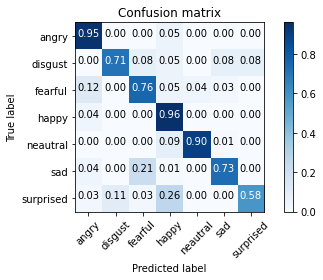

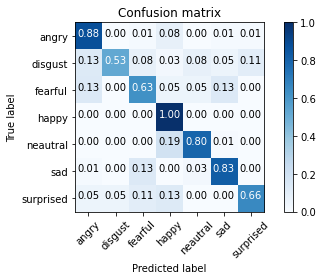

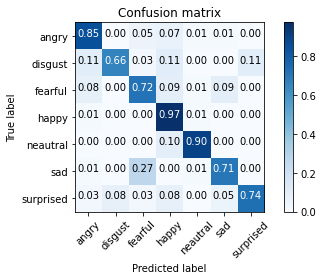

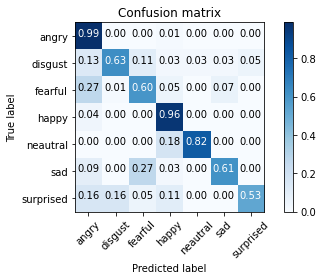

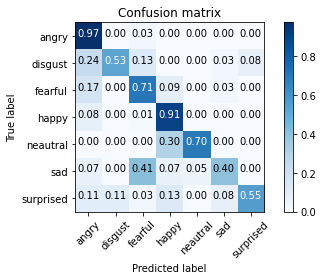

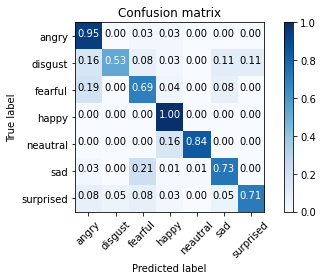

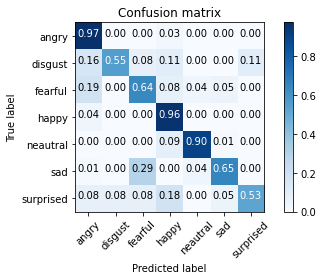

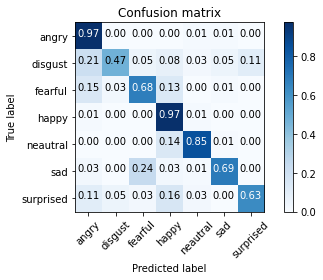

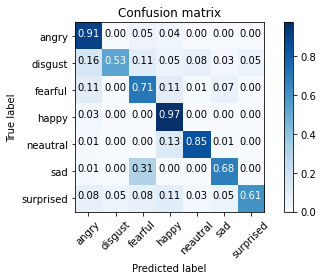

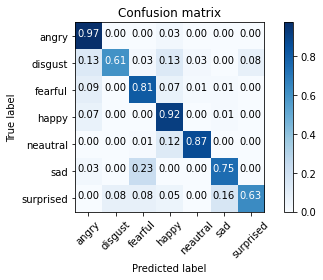

In [40]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
import time 

print(x_traincnn.shape, y_train.shape)
a = time.time()
results=0
fold_num=10
X_train = joblib.load('X_train.joblib')
y_train1 = joblib.load('y_train.joblib')



x_traincnn = np.expand_dims(X_train, axis=2)
print(x_traincnn.shape,y_train.shape)
print(y_train[0])
kfold = KFold(n_splits=fold_num,shuffle=True,random_state=5576)

y_list=[]
for train,test in kfold.split(x_traincnn):
    x_train,x_test=x_traincnn[train],x_traincnn[test]
    print(train.shape,test.shape)
    y_train,y_test=y_train1[train],y_train1[test]
    
    model = Sequential()

    model.add(Conv1D(16, 5,padding='same',
                 input_shape=(40,1)))
    model.add(LeakyReLU())
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Conv1D(32, 5,padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Conv1D(64, 5,padding='same',))
    model.add(LeakyReLU())
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Conv1D(128,5,padding='same',))
    model.add(LeakyReLU())

    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Conv1D(256, 5,padding='same',))
    model.add(LeakyReLU())
    model.add(Dropout(0.1))
    model.add(MaxPooling1D(pool_size=(2)))

    model.add(Flatten())
    model.add(Dense(128))

    model.add(LeakyReLU())
    model.add(Dense(7))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    cnnhistory=model.fit(x_train, y_train, batch_size=128, epochs=1000)
    x_testcnn = joblib.load('X_test.joblib')
    y_test1 = joblib.load('y_test.joblib')
    prediction_name = 'speech_prediction'
    
    
    x_testcnn = np.expand_dims(x_testcnn, axis=2)
    from sklearn.metrics import classification_report,confusion_matrix
    y_pred = np.argmax(model.predict(x_testcnn), axis=-1)
    y_test2 = np.argmax(y_test1, axis=-1)
    result =model.evaluate(x_testcnn,y_test1)
    results +=result[1]
    y_list.append(result[1])
    
   
    savedprediction = joblib.dump(y_pred, prediction_name)
    target_names = ['angry', 'disgust', 'fearful','happy','neautral','sad','surprised']
    print(classification_report(y_test2, y_pred, target_names=target_names))
    cnf_matrix = confusion_matrix(y_test2,y_pred)

    np.set_printoptions(precision=2)
    
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=target_names,normalize=True)
print(time.time()-a)  
print("平均測試率:(%.3f)"%(results/fold_num))


In [41]:
for i in range(fold_num):
    print('The'+str(i)+' is {}'.format(y_list[i]))

The0 is 0.8302658200263977
The1 is 0.7873210906982422
The2 is 0.8159509301185608
The3 is 0.7648261785507202
The4 is 0.7034764885902405
The5 is 0.8077709674835205
The6 is 0.7873210906982422
The7 is 0.7914110422134399
The8 is 0.7852760553359985
The9 is 0.8261758685112


# Test data Extract

In [91]:
model.load_weights('ASR1.h5')
import joblib
import keras

X_name = 'X_test.joblib'
y_name = 'y_test.joblib'
'''
x_testcnn,y_test =data_extract('test') 
y_onehot = keras.utils.to_categorical(y_test, num_classes=7)
joblib.dump(x_testcnn,X_name)
joblib.dump(y_onehot, y_name)
'''

  1%|          | 3/489 [00:00<00:23, 20.97it/s]

489


100%|██████████| 489/489 [00:40<00:00, 12.10it/s]


# Show Result

In [92]:
x_testcnn = joblib.load('X_test.joblib')
y_test = joblib.load('y_test.joblib')
prediction_name = 'speech_prediction'
x_testcnn = np.expand_dims(x_testcnn, axis=2)
from sklearn.metrics import classification_report,confusion_matrix
y_pred = np.argmax(model.predict(x_testcnn), axis=-1)
y_test = np.argmax(y_test, axis=-1)
savedprediction = joblib.dump(y_pred, prediction_name)
target_names = ['angry', 'disgust', 'fearful','happy','neautral','sad','surprised']
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test,y_pred))